# CSE 555 Introduction to Pattern Recognition Spring 2020
# Problem Set 5 - Generative Models
## Srisai Karthik Neelamraju, 50316785 neelamra@buffalo.edu

## 4. Implementing GAN to generate MNIST images

### Importing the required libraries

NumPy is used for basic matrix operations.<br>
TensorFlow is used to implement the neural networks and import the MNIST dataset.<br>
Matplotlib is used for visualizing images generated by the GAN.<br>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as k
from matplotlib import pyplot as plt

### Loading the MNIST dataset

MNIST Dataset contains 28 $\times$ 28 dimensional grayscale images of handwritten digits from 0 to 9. Specifically, there are 60,000 images in the training set and 10,000 images in the test set. Each of these 70,000 images belongs to one of these 10 classes and has associated with it a label from 0 to 9.

In [2]:
# loading the dataset consisting of 60,000 training images
(X_train, _), (_, _) = mnist.load_data()

x_dim, y_dim = X_train[0].shape

# reshaping the input array to include channels
X_train = X_train.reshape(X_train.shape[0], x_dim, y_dim, 1)

# normalizing the data
X_train =  X_train / 255

### Creating a class for implementing a Generative Adversarial Network

In [3]:
class GAN:
    """
        implements a generative adversarial network (GAN)
    """

    def __init__(self, latent_dim=25, show_summary=False):
        """
            initializes a GAN
        """
        self.latent_dim = latent_dim
        
        # defining the discriminator architecture
        self.discriminator = self.init_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam())

        # defining the generator architecture
        self.generator = self.init_generator()

        # defining the combined GAN architecture
        z = tf.keras.layers.Input(shape=(self.latent_dim,))
        img = self.generator(z)
        self.discriminator.trainable = False
        validity = self.discriminator(img)
        self.gan = tf.keras.Model(z, validity)
        self.gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam())

        if show_summary:
            print("Generator Network")
            self.generator.summary()
            print("Discriminator Network")
            self.discriminator.summary()
            print("GAN Combined Network")
            self.gan.summary()

    def init_generator(self):
        """
            generator neural network with dense layers
        """
        generator = tf.keras.Sequential()
        generator.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(self.latent_dim, )))
        generator.add(tf.keras.layers.BatchNormalization(momentum=0.8))
        generator.add(tf.keras.layers.Dense(512, activation='relu'))
        generator.add(tf.keras.layers.BatchNormalization(momentum=0.8))
        generator.add(tf.keras.layers.Dense(x_dim*y_dim, activation='sigmoid'))
        generator.add(tf.keras.layers.Reshape((x_dim, y_dim , 1)))
        return generator

    def init_discriminator(self):
        """
            discriminator neural network with dense layers
        """
        discriminator = tf.keras.Sequential()
        discriminator.add(tf.keras.layers.Flatten(input_shape=(x_dim, y_dim, 1)))
        discriminator.add(tf.keras.layers.Dense(512, activation='relu'))
        discriminator.add(tf.keras.layers.Dense(256, activation='relu'))
        discriminator.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        return discriminator
    
    def train(self, X_train, steps=30, batch_size=32):
        """
            trains the GAN on the MNIST training set
        """
        print("Training the GAN for " + str(steps) + " steps with batch size " + str(batch_size) + "...")
        
        # adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for i in range(steps):

            # sampling a mini-batch of images from the training set
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # generating a batch of new images from random noise
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # training the discriminator
            self.discriminator.train_on_batch(imgs, valid)
            self.discriminator.train_on_batch(gen_imgs, fake)
            
            # Training the gan
            self.gan.train_on_batch(noise, valid)
            
        print("DONE")

    def generate_images(self, n=25):
        """
            generates images from the GAN
        """
        print("Generating some images from the trained GAN")
        fig = plt.figure(figsize=(7, 7))
        for i in range(n):
            sub = fig.add_subplot(5, 5, i + 1)
            sub.imshow(self.generator.predict(np.random.normal(size=(1, self.latent_dim))).reshape(x_dim, y_dim), cmap='gray')
            plt.axis('off')

### Training a Generative Adversarial Network

In [4]:
gan = GAN()
gan.train(X_train, steps=30000, batch_size=64)

Instructions for updating:
Colocations handled automatically by placer.
Training the GAN for 30000 steps with batch size 64...
Instructions for updating:
Use tf.cast instead.
DONE


### Generating a few images using the trained GAN

Generating some images from the trained GAN


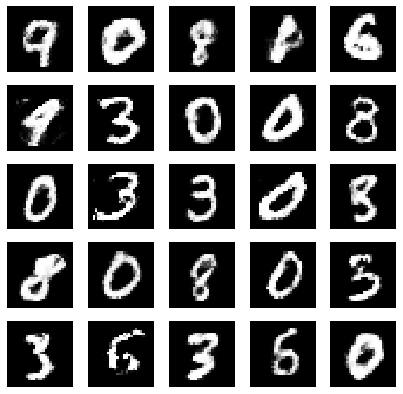

In [5]:
gan.generate_images()

### References

1. Duda, Richard O., Peter E. Hart, and David G. Stork. Pattern Classification. John Wiley & Sons, 2012. <br>
2. CSE 555 Intoduction to Pattern Recognition Lecture Slides by Prof. Wen Dong <br>
3. https://github.com/eriklindernoren/Keras-GAN/blob/master/dcgan/dcgan.py <br>
4. http://yann.lecun.com/exdb/mnist/